# 資料讀取
資料來源:\
政府資料開放平台 臺北市公共自行車2.0租借紀錄\
政府資料開放平台 YouBike臺北市站位每月使用量\
政府資料開放平台 YouBike2.0臺北市公共自行車即時資訊 \
CODiS 氣候觀測資料查詢服務 \
(網址見程式碼)

讀取 臺北市公共自行車2.0租借紀錄 每個月的資料下載網址

In [1]:
import pandas as pd

download_url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike_second_ticket_opendata/YouBikeHis.csv"
df_url = pd.read_csv(download_url, encoding = "utf-8")
df_url = df_url.iloc[::-1].reset_index(drop=True)  # 日期由小到大
display(df_url.head())
display(df_url.tail())

,UpdateTime,SrcUpdateTime,fileinfo,fileURL
0,2022-01-25T00:12:05+08:00,2021-04-16T00:00:00+08:00,2020年4月,https://tcgbusfs.blob.core.windows.net/dotapp/...
1,2022-01-25T00:12:05+08:00,2021-04-16T00:00:00+08:00,2020年5月,https://tcgbusfs.blob.core.windows.net/dotapp/...
2,2022-01-25T00:12:05+08:00,2021-04-16T00:00:00+08:00,2020年6月,https://tcgbusfs.blob.core.windows.net/dotapp/...
3,2022-01-25T00:12:05+08:00,2021-04-16T00:00:00+08:00,2020年7月,https://tcgbusfs.blob.core.windows.net/dotapp/...
4,2022-01-25T00:12:05+08:00,2021-04-16T00:00:00+08:00,2020年8月,https://tcgbusfs.blob.core.windows.net/dotapp/...


,UpdateTime,SrcUpdateTime,fileinfo,fileURL
46,2024-05-03T11:10:52+08:00,2024-05-03T11:10:52+08:00,2024年2月,https://tcgbusfs.blob.core.windows.net/dotapp/...
47,2024-05-03T11:10:52+08:00,2024-05-03T11:10:52+08:00,2024年3月,https://tcgbusfs.blob.core.windows.net/dotapp/...
48,2024-08-05T16:30:28+08:00,2024-08-05T16:30:28+08:00,2024年4月,https://tcgbusfs.blob.core.windows.net/dotapp/...
49,2024-08-05T16:30:28+08:00,2024-08-05T16:30:28+08:00,2024年5月,https://tcgbusfs.blob.core.windows.net/dotapp/...
50,2024-08-05T16:30:28+08:00,2024-08-05T16:30:28+08:00,2024年6月,https://tcgbusfs.blob.core.windows.net/dotapp/...


讀取
1. 2020年11月到2024年5月所有csv, 紀錄每個月的交易量 (列數)\
(此處程式碼需要較長的執行時間)
2. YouBike臺北市站位每月使用量

In [2]:
import zipfile
import chardet
import io
import requests

def decoding_file(response):
  with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    csv_files = [name for name in zip_ref.namelist() if name.endswith(".csv")] # 讀取壓縮檔內所有csv

    for csv_file in csv_files:
      with zip_ref.open(csv_file) as file:
        try:
          lines = []
          for line in file:
            lines.append(line.decode("utf-8","ignore"))
        except UnicodeDecodeError:  # utf-8 解碼失敗
          file.seek(0)
          raw_data = file.read(4096)
          result = chardet.detect(raw_data)  # 偵測編碼
          encoding = result["encoding"]

          file.seek(0)
          lines = []
          for line in file:
            lines.append(line.decode(encoding,"ignore"))


        content = "\n".join(lines)
        return content

In [3]:
import pandas as pd


# 儲存每月的交易量
df_monthly = pd.DataFrame(columns=["年月", "臺北市公共自行車2.0租借紀錄算得每月交易量"])

for i in range(7, 50):  # 2020年11月到2024年5月
  url = df_url["fileURL"][i]
  response = requests.get(url)
  content = decoding_file(response)
  df = pd.read_csv(io.StringIO(content), header=None)
  df_monthly.loc[i-7] = [df_url["fileinfo"][i], df.shape[0]]  # 紀錄列數

display(df_monthly)

,年月,臺北市公共自行車2.0租借紀錄算得每月交易量
0,2020年11月,232848
1,2020年12月,220528
2,2021年1月,187822
3,2021年2月,153277
4,2021年3月,264546
5,2021年4月,251194
6,2021年5月,269976
7,2021年6月,236111
8,2021年7月,373417
9,2021年8月,601960


In [4]:
# 讀取 YouBike 臺北市站位每月使用量
url = "https://data.taipei/api/dataset/d8cefb03-aba2-41ca-9996-d8774313cdc6/resource/8f690548-61bc-4bff-8baa-01d465eb672c/download"
df = pd.read_csv(url, encoding = "big5")
df_monthly["YouBike臺北市站位每月使用量"] = df["臺北市YouBike每月使用量（次數）"]
display(df_monthly.tail())

,年月,臺北市公共自行車2.0租借紀錄算得每月交易量,YouBike臺北市站位每月使用量
38,2024年1月,2746557,4002354
39,2024年2月,2590755,3648833
40,2024年3月,3472416,4945217
41,2024年4月,3798550,5312227
42,2024年5月,4338453,6096098


折線圖

In [5]:
# 處理中文字形

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont("TaipeiSansTCBeta-Regular.ttf")
mpl.rc("font", family="Taipei Sans TC Beta")

--2024-11-19 11:45:10--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.126.113, 74.125.126.101, 74.125.126.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-11-19 11:45:10--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.193.132, 2607:f8b0:4001:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  57.8MB/s    in 0.3s    

2024-11-19 11:4

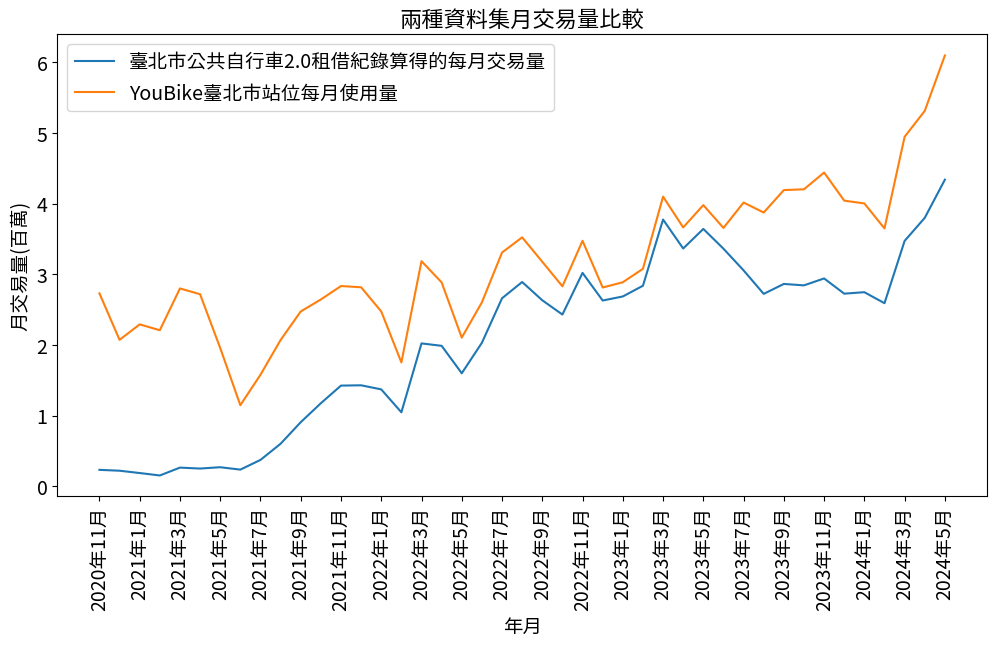

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 6))
plt.plot([i for i in range(43)], df_monthly["臺北市公共自行車2.0租借紀錄算得每月交易量"], label="臺北市公共自行車2.0租借紀錄算得的每月交易量")
plt.plot([i for i in range(43)], df_monthly["YouBike臺北市站位每月使用量"], label="YouBike臺北市站位每月使用量")
plt.xlabel("年月", fontsize = 14)
plt.ylabel("月交易量(百萬)", fontsize = 14)
plt.xticks([i for i in range(0, 43, 2)], [df_monthly["年月"][i] for i in range(0, 43, 2)], fontsize = 14, rotation = 90)
plt.yticks([1000000*i for i in range(7)], [str(i) for i in range(7)], fontsize=14)
plt.title("兩種資料集月交易量比較", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

兩者有顯著差距,我們推測原因可能為
1. "臺北市公共自行車2.0租借紀錄算得每月交易量"只統計票證刷卡資料,但"YouBike臺北市站位每月使用量"可能包含手機掃碼
2. "臺北市公共自行車2.0租借紀錄算得每月交易量"可能有資料缺失(或因編碼問題)

因此後續的分析,將以兩者差距較小的2023年3月為基礎

下載2023年3月完整資料

In [7]:
response = requests.get(df_url["fileURL"][35])
df_202303 = None

# 讀取 zip 檔案內的 csv
content = decoding_file(response)
col_names = ["借車時間", "借車場站", "還車時間", "還車場站", "借用時長", "借用日期"]
df_202303 = pd.read_csv(io.StringIO(content), header=None, names = col_names)
df_202303 = df_202303.iloc[1:,:]  # 去除表頭

# 時間轉換
df_202303["借用日期"] = pd.to_datetime(df_202303["借用日期"])
df_202303["借車時間(小時)"] = pd.to_datetime(df_202303["借車時間"]).dt.hour  # 原始資料時間僅有到小時的精確度
df_202303["還車時間(小時)"] = pd.to_datetime(df_202303["還車時間"]).dt.hour
df_202303["借用時長"] = pd.to_timedelta(df_202303["借用時長"])
df_202303 = df_202303.reindex(columns = ["借用日期","借車時間(小時)","借車場站","還車時間(小時)","還車場站","借用時長"])

# 測試輸出
display(df_202303)

,借用日期,借車時間(小時),借車場站,還車時間(小時),還車場站,借用時長
1,2023-03-23,10,捷運大橋頭站(2號出口),10,民權迪化街口,0 days 00:01:39
2,2023-03-23,23,協和祐德高級中學,23,玉成公園(成福路178巷口),0 days 00:02:06
3,2023-03-23,23,協和祐德高級中學,23,南港公園(福德街),0 days 00:03:37
4,2023-03-23,23,協和祐德高級中學,23,百福公園,0 days 00:07:20
5,2023-03-23,8,福德國小公車站,8,松山車站,0 days 00:06:40
...,...,...,...,...,...,...
3774366,2023-03-15,20,世新大學,20,永安藝文館-表演36房,0 days 00:15:53
3774367,2023-03-15,18,捷運葫洲站(1號出口),19,南港抽水站,0 days 00:16:40
3774368,2023-03-15,13,捷運善導寺站(3號出口)(忠孝東,13,捷運東門站(3號出口),0 days 00:09:59
3774369,2023-03-15,9,仁愛延吉街口,9,興雅松仁路口,0 days 00:08:55


讀取 YouBike2.0臺北市公共自行車即時資訊 以取得每個台北市站點所在的行政區與可停車數

In [8]:
file_path = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"
stationInfo = pd.read_json(file_path)
stationInfo = stationInfo[["sna", "sarea", "total"]]
stationInfo = stationInfo.rename(columns = {"sna": "場站名稱", "sarea": "行政區", "total": "可停車數"})
display(stationInfo.head())

,場站名稱,行政區,可停車數
0,YouBike2.0_捷運科技大樓站,大安區,28
1,YouBike2.0_復興南路二段273號前,大安區,21
2,YouBike2.0_國北教大實小東側門,大安區,16
3,YouBike2.0_和平公園東側,大安區,11
4,YouBike2.0_辛亥復興路口西北側,大安區,16


刪除站名 "YouBike2.0_"的前綴 並隨機確認一站點

In [9]:
stationInfo["場站名稱"] = stationInfo["場站名稱"].str.replace("YouBike2.0_", "")  # 去除前綴
display(stationInfo.head())
print("臺大鄭江樓北側" in stationInfo["場站名稱"].values)

,場站名稱,行政區,可停車數
0,捷運科技大樓站,大安區,28
1,復興南路二段273號前,大安區,21
2,國北教大實小東側門,大安區,16
3,和平公園東側,大安區,11
4,辛亥復興路口西北側,大安區,16


True


讀取 CODiS 氣候觀測資料 查詢服務2023年各天降雨時數資料

In [10]:
rainfall_data = pd.read_csv("https://drive.google.com/uc?id=1zQcnzHEioLxFi0DlhYUa-5IC_44YJ3Pk")
display(rainfall_data)

,日/月,1,2,3,4,5,6,7,8,9,10,11,12
0,01,2.6,0.0,0.0,7.5,0.2,4.8,0.5,5.7,1.1,1.0,0.0,9.9
1,02,6.6,0.0,0.0,0.0,0.0,0.0,0.6,7.5,5.9,0.6,0.0,2.2
2,03,2.3,0.0,0.0,0.0,0.0,0.0,0.0,9.6,6.7,8.2,0.0,3.0
3,04,5.9,6.2,0.0,0.0,0.0,6.1,0.0,0.0,8.5,13.5,0.0,19.3
4,05,2.8,15.7,0.0,2.9,0.0,1.6,0.0,0.0,0.4,7.6,0.0,5.5
5,06,6.8,9.3,0.0,1.2,1.1,0.0,0.0,0.0,5.8,0.4,0.0,10.5
6,07,0.0,0.4,0.0,8.5,7.1,0.0,0.0,0.0,1.3,2.1,0.0,0.0
7,08,0.0,0.0,0.0,0.0,13.1,0.0,0.0,0.0,1.6,2.0,0.0,0.0
8,09,3.8,0.1,0.4,0.0,0.0,1.6,0.0,0.0,0.0,1.2,0.0,0.0
9,10,2.9,2.9,0.0,0.0,0.0,0.7,0.0,3.8,0.0,0.0,2.1,0.0


# 2023年3月總體資料分析

借用時長分析

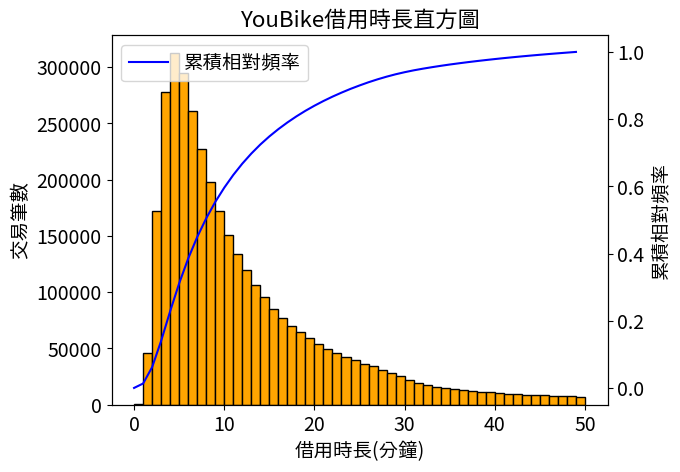

In [11]:
# 帶有累積相對頻率的直方圖
fig, ax1 = plt.subplots()

# 直方圖
df_202303["借用時長_分鐘"] = df_202303["借用時長"].dt.total_seconds() / 60
n, bins, patches = ax1.hist(df_202303["借用時長_分鐘"], bins=50, range=(0, 50), color="orange", edgecolor="black")
ax1.set_ylabel("交易筆數", fontsize=14)
ax1.tick_params(axis="y", labelsize=14)

# 累積相對頻率圖
import numpy as np
ax2 = ax1.twinx()  # 使用另外一個 y 軸, 共用 x 軸
cumulative = np.cumsum(n)  # 累積頻率
cumulative_normalized = cumulative / cumulative[-1]  # 累積相對頻率 (除以總數)
ax2.plot(bins[:-1], cumulative_normalized, color="blue", label="累積相對頻率")
ax2.set_ylabel("累積相對頻率", fontsize=14)
ax2.tick_params(axis="y", labelsize=14)

# 標題
ax1.set_title("YouBike借用時長直方圖", fontsize=16)
ax1.set_xlabel("借用時長(分鐘)", fontsize=14)
ax1.tick_params(axis="x", labelsize=14)
plt.legend(fontsize=14)
plt.show()

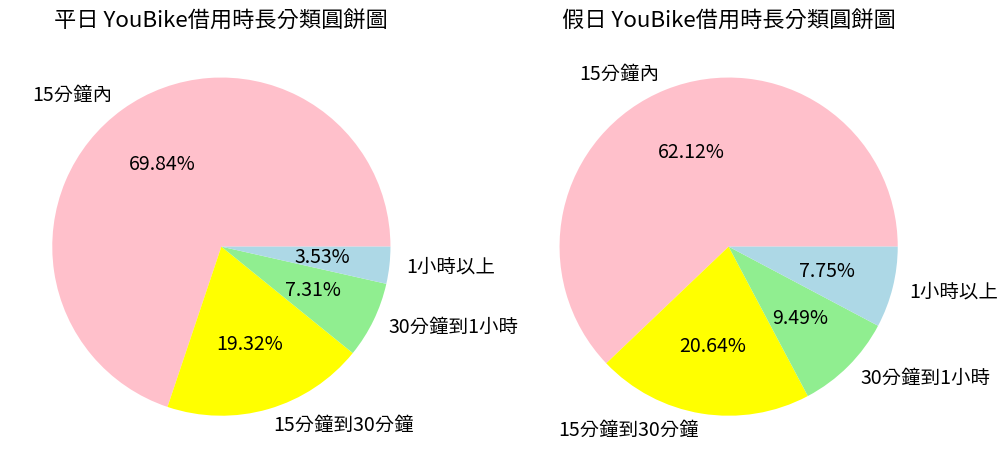

In [12]:
# 分為平日與假日的借用時長圓餅圖

# 定義分組範圍（分鐘）
bins = [0, 15, 30, 60, float("inf")]
labels = ["15分鐘內", "15分鐘到30分鐘", "30分鐘到1小時", "1小時以上"]

# 使用 pd.cut() 分類
df_202303["時長分類"] = pd.cut(df_202303["借用時長_分鐘"], bins=bins, labels=labels)

# 分別計算平日和假日的時長分類數量
weekday_counts = df_202303[df_202303["借用日期"].dt.dayofweek < 5]["時長分類"].value_counts()
weekend_counts = df_202303[df_202303["借用日期"].dt.dayofweek >= 5]["時長分類"].value_counts()

# 繪製平日圓餅圖
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(weekday_counts, autopct = "%1.2f%%", labels = labels,
        colors = ["pink", "yellow", "lightgreen", "lightblue"],
        textprops = {"fontsize": 14})
plt.title("平日 YouBike借用時長分類圓餅圖", fontsize = 16)

# 繪製假日圓餅圖
plt.subplot(1, 2, 2)
plt.pie(weekend_counts, autopct = "%1.2f%%", labels = labels,
        colors = ["pink", "yellow", "lightgreen", "lightblue"],
        textprops = {"fontsize": 14})
plt.title("假日 YouBike借用時長分類圓餅圖", fontsize = 16)

plt.show()

交易筆數

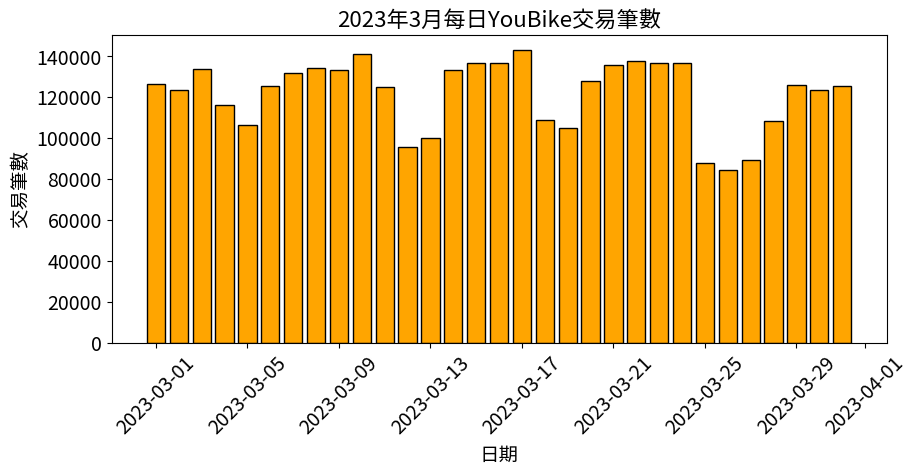

In [13]:
daily_transactions = df_202303.groupby("借用日期").size()

# 每日交易筆數長條圖
plt.figure(figsize=(10, 4))
plt.bar(daily_transactions.index, daily_transactions, color = "orange", edgecolor = "black")
plt.title("2023年3月每日YouBike交易筆數", fontsize = 16)
plt.ylabel("交易筆數", fontsize=14)
plt.xlabel("日期", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

交易筆數的變化週期似乎並不全然是和平日與假日相關
考慮降雨對交易量的影響
繪製單日降雨時數對該日總交易量的散布圖與迴歸

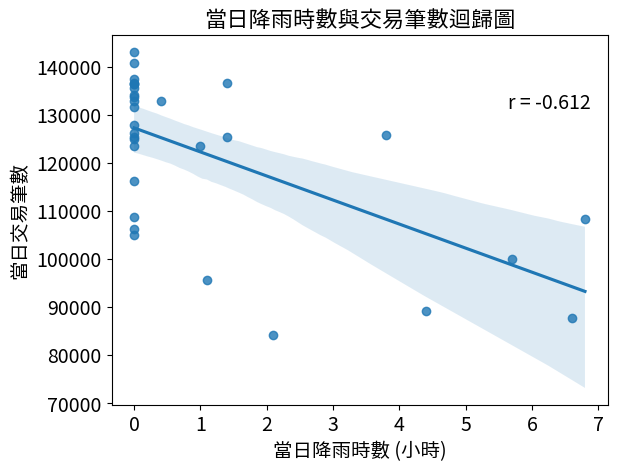

In [14]:
import seaborn as sns
from scipy.stats import linregress

# 合併降雨時數與交易筆數為一個 DateFrame
data = pd.DataFrame({
    "Rainfall": rainfall_data.iloc[:31, 3].values,
    "Daily_Transactions": daily_transactions
})

# 迴歸
slope, intercept, r_value, p_value, std_err = linregress(data["Rainfall"], data["Daily_Transactions"])

# seaborn 作圖
sns.regplot(x = "Rainfall", y = "Daily_Transactions", data = data)
plt.text(0.8, 0.8, f"r = {r_value:.3f}",
    transform=plt.gca().transAxes, fontsize = 14)  # 轉換座標軸為圖表的相對位置 (左下0 右上1)
plt.title("當日降雨時數與交易筆數迴歸圖", fontsize = 16)
plt.xlabel("當日降雨時數 (小時)", fontsize = 14)
plt.ylabel("當日交易筆數", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

但平日與假日直覺上交易量應有所差異
因此繪製平日與假日的每小時平均交易筆數長條圖

In [15]:
# 計算每日每小時的交易量
daily_hourly_transactions = df_202303.groupby(["借用日期", "借車時間(小時)"]).size().reset_index()
daily_hourly_transactions = daily_hourly_transactions.rename(columns={0: "交易筆數"})
display(daily_hourly_transactions)

# 新增欄位:平日或假日
daily_hourly_transactions["日期類型"] = daily_hourly_transactions["借用日期"].apply(lambda x: "平日" if x.dayofweek < 5 else "假日")

# 根據日期類型和小時分組資料，並計算每小時的平均交易筆數
hourly_transactions = daily_hourly_transactions.groupby(["日期類型", "借車時間(小時)"])["交易筆數"].mean().reset_index()
hourly_transactions = hourly_transactions.rename(columns={"交易筆數": "平均交易筆數"})

# 分離平日和假日的資料
weekday_data = hourly_transactions[hourly_transactions["日期類型"] == "平日"]
weekend_data = hourly_transactions[hourly_transactions["日期類型"] == "假日"]

,借用日期,借車時間(小時),交易筆數
0,2023-03-01,0,979
1,2023-03-01,1,399
2,2023-03-01,2,257
3,2023-03-01,3,175
4,2023-03-01,4,249
...,...,...,...
739,2023-03-31,19,7681
740,2023-03-31,20,5763
741,2023-03-31,21,5499
742,2023-03-31,22,3967


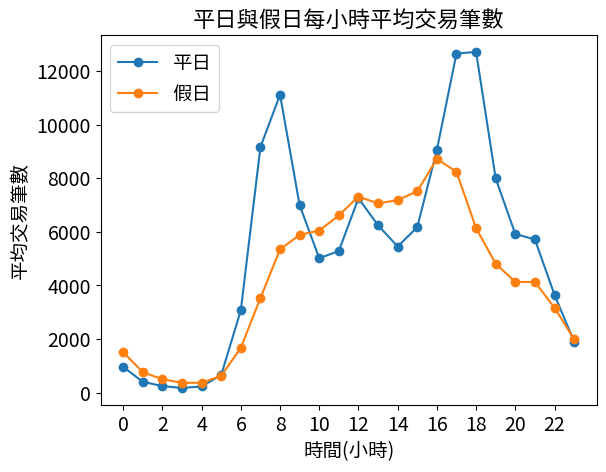

In [16]:
# 繪製折線圖
plt.plot(weekday_data["借車時間(小時)"], weekday_data["平均交易筆數"], label="平日", marker="o")
plt.plot(weekend_data["借車時間(小時)"], weekend_data["平均交易筆數"], label="假日", marker="o")

# 設定圖表標題和標籤
plt.title("平日與假日每小時平均交易筆數", fontsize=16)
plt.xlabel("時間(小時)", fontsize=14)
plt.ylabel("平均交易筆數", fontsize=14)
plt.xticks([i for i in range(0, 23, 2)], fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize=14)
plt.show()

台北市各行政區總車架數、總借用與還車數統計

,行政區,可停車數
0,中山區,4082
1,中正區,3381
2,信義區,3498
3,內湖區,4036
4,北投區,2709
5,南港區,2526
6,士林區,3096
7,大同區,1758
8,大安區,5230
9,文山區,2400


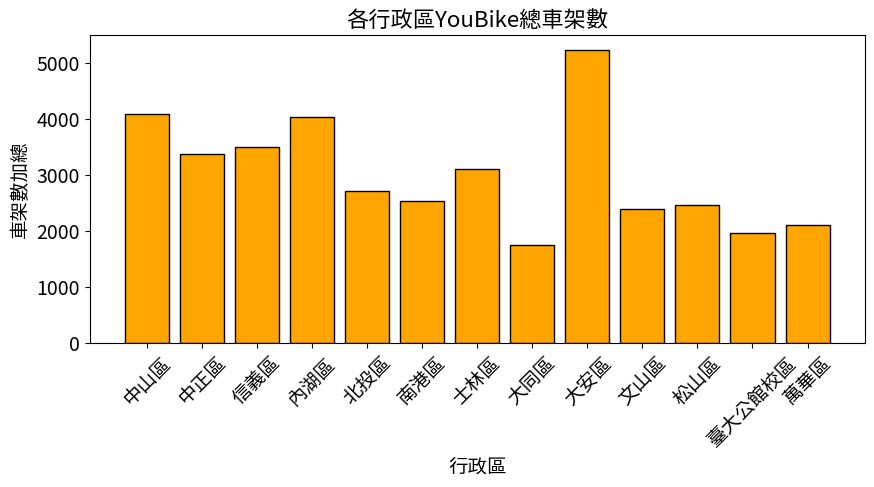

In [17]:
total_stop = stationInfo.groupby("行政區")["可停車數"].sum().reset_index()
display(total_stop)

# 長條圖
plt.figure(figsize=(10, 4))
plt.bar(total_stop["行政區"], total_stop["可停車數"], color="orange", edgecolor="black")
plt.title("各行政區YouBike總車架數", fontsize=16)
plt.xlabel("行政區", fontsize=14)
plt.ylabel("車架數加總", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [18]:
# 字典: key = 場站名稱, value = 行政區 (比series 尋找快)
station_area_mapping = stationInfo.set_index("場站名稱")["行政區"].to_dict()
df_202303["借車行政區"] = df_202303["借車場站"].map(station_area_mapping)
df_202303["還車行政區"] = df_202303["還車場站"].map(station_area_mapping)

print("# of rows before dropping na", len(df_202303))
df_202303 = df_202303.dropna(subset=["借車行政區", "還車行政區"])
print("# of rows after dropping na", len(df_202303))

# 計算借還數量
rent_count = df_202303.groupby("借車行政區").size().reset_index()
rent_count = rent_count.rename(columns = {0 : "日均借車量"})
rent_count["日均借車量"] = rent_count["日均借車量"] / 31
return_count = df_202303.groupby("還車行政區").size().reset_index()
return_count = return_count.rename(columns = {0 : "日均還車量"})
return_count["日均還車量"] = return_count["日均還車量"] / 31

display(rent_count)
display(return_count)

# of rows before dropping na 3774370
# of rows after dropping na 3566282


,借車行政區,日均借車量
0,中山區,13397.677419
1,中正區,10565.806452
2,信義區,13305.774194
3,內湖區,5393.612903
4,北投區,5127.548387
5,南港區,4382.645161
6,士林區,7853.741935
7,大同區,6247.032258
8,大安區,24929.000000
9,文山區,3349.967742


,還車行政區,日均還車量
0,中山區,13283.258065
1,中正區,10431.451613
2,信義區,13320.612903
3,內湖區,5332.290323
4,北投區,5209.516129
5,南港區,4351.870968
6,士林區,7956.741935
7,大同區,6341.709677
8,大安區,24969.645161
9,文山區,3424.419355


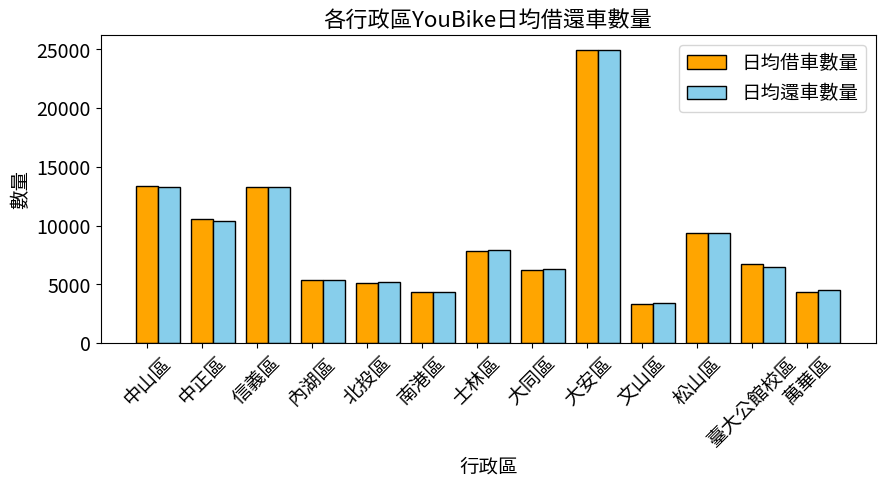

In [19]:
bar_width = 0.4
r1 = [i for i in range(len(total_stop["行政區"]))]
r2 = [x + bar_width for x in r1]

# 並列長條圖
plt.figure(figsize=(10, 4))
plt.bar(r1, rent_count["日均借車量"], color="orange", width=bar_width, edgecolor="black", label="日均借車數量")
plt.bar(r2, return_count["日均還車量"], color="skyblue", width=bar_width, edgecolor="black", label="日均還車數量")
plt.xlabel("行政區", fontsize=14)
plt.ylabel("數量", fontsize=14)
plt.title("各行政區YouBike日均借還車數量", fontsize=16)
plt.xticks([r for r in range(len(total_stop["行政區"]))], list(total_stop["行政區"]), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# 2023年3月站別資料分析

In [20]:
# check 目前的 dataframe
df_202303["借用日期類型"] = df_202303["借用日期"].apply(lambda x: "平日" if x.dayofweek < 5 else "假日")
df_202303 = df_202303.reindex(columns = ["借用日期", "借用日期類型", "借車時間(小時)", "借車行政區", "借車場站", "還車時間(小時)", "還車行政區", "還車場站", "借用時長", "借用時長_分鐘", "時長分類"])
df_202303 = df_202303.sort_values(by=["借用日期", "借車時間(小時)"])
display(df_202303)

,借用日期,借用日期類型,借車時間(小時),借車行政區,借車場站,還車時間(小時),還車行政區,還車場站,借用時長,借用時長_分鐘,時長分類
74778,2023-03-01,平日,0,內湖區,康寧金湖路口,0,內湖區,康寧路一段156巷20弄口,0 days 00:03:00,3.000000,15分鐘內
74801,2023-03-01,平日,0,松山區,捷運南京復興站(5號出口),0,中正區,河堤國小,0 days 00:35:54,35.900000,30分鐘到1小時
75172,2023-03-01,平日,0,信義區,松德虎林街口,0,信義區,信義松德路口,0 days 00:03:40,3.666667,15分鐘內
75310,2023-03-01,平日,0,信義區,泰和里民活動中心,0,信義區,吳興街260巷,0 days 00:05:01,5.016667,15分鐘內
75395,2023-03-01,平日,0,中山區,建國長春路口(北側),0,松山區,民生復興路口,0 days 00:07:35,7.583333,15分鐘內
...,...,...,...,...,...,...,...,...,...,...,...
3717662,2023-03-31,平日,23,大同區,永樂市場,23,大同區,捷運中山站(5號出口),0 days 00:13:51,13.850000,15分鐘內
3717729,2023-03-31,平日,23,大同區,永樂市場,23,大同區,捷運大橋頭站(1A出口),0 days 00:06:34,6.566667,15分鐘內
3724163,2023-03-31,平日,23,大同區,圓環站,23,大同區,捷運中山站(5號出口),0 days 00:05:28,5.466667,15分鐘內
3724165,2023-03-31,平日,23,大同區,圓環站,23,中正區,中華路一段21巷口,0 days 00:14:28,14.466667,15分鐘內


找出整體 (平日加假日) 借車與還車次數前十多的場站

In [21]:
# 因為需要話多次長條圖 所以先定義畫圖的 function

def bar_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color="skyblue", edgecolor="black")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

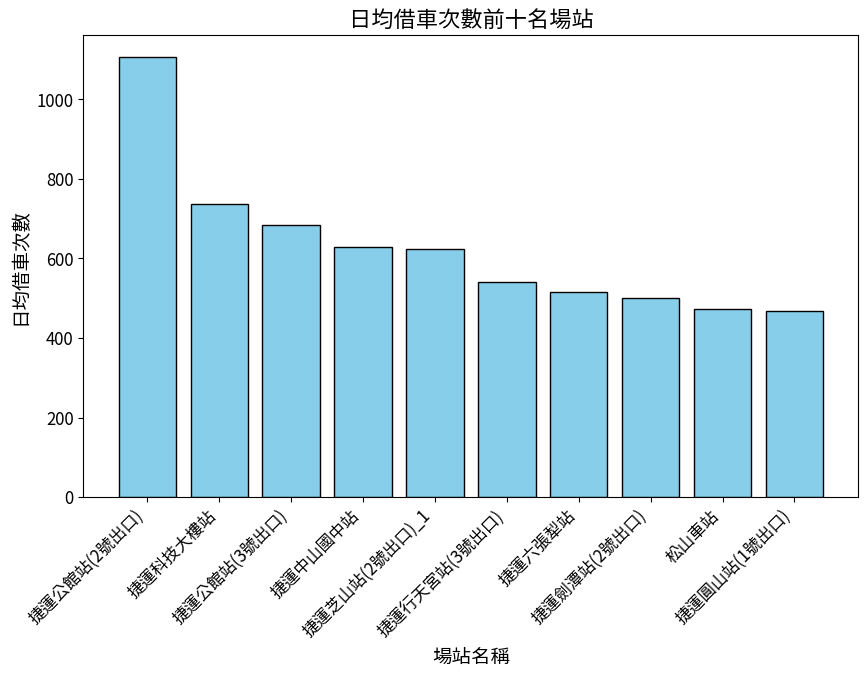

In [22]:
#找出整體借車次數前十多的場站

station_rent_counts = df_202303.groupby("借車場站").size().reset_index()
station_rent_counts = station_rent_counts.rename(columns = {0: "借車次數"})
station_rent_counts["日均借車次數"] = station_rent_counts["借車次數"] / 31
top_10_stations = station_rent_counts.sort_values(by=["日均借車次數"], ascending=False).head(10)
bar_plot(x = top_10_stations["借車場站"], y = top_10_stations["日均借車次數"], title = "日均借車次數前十名場站", xlabel = "場站名稱", ylabel = "日均借車次數")

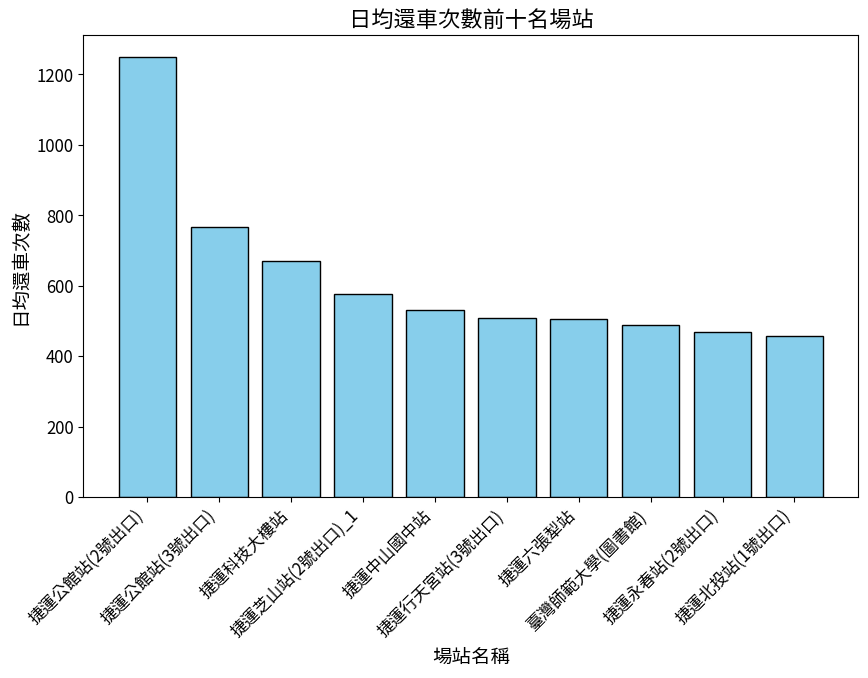

In [23]:
#找出整體還車次數前十多的場站

station_return_counts = df_202303.groupby("還車場站").size().reset_index()
station_return_counts = station_return_counts.rename(columns = {0: "還車次數"})
station_return_counts["日均還車次數"] = station_return_counts["還車次數"] / 31
top_10_stations = station_return_counts.sort_values(by=["日均還車次數"], ascending=False).head(10)
bar_plot(x = top_10_stations["還車場站"], y = top_10_stations["日均還車次數"], title = "日均還車次數前十名場站", xlabel = "場站名稱", ylabel = "日均還車次數")

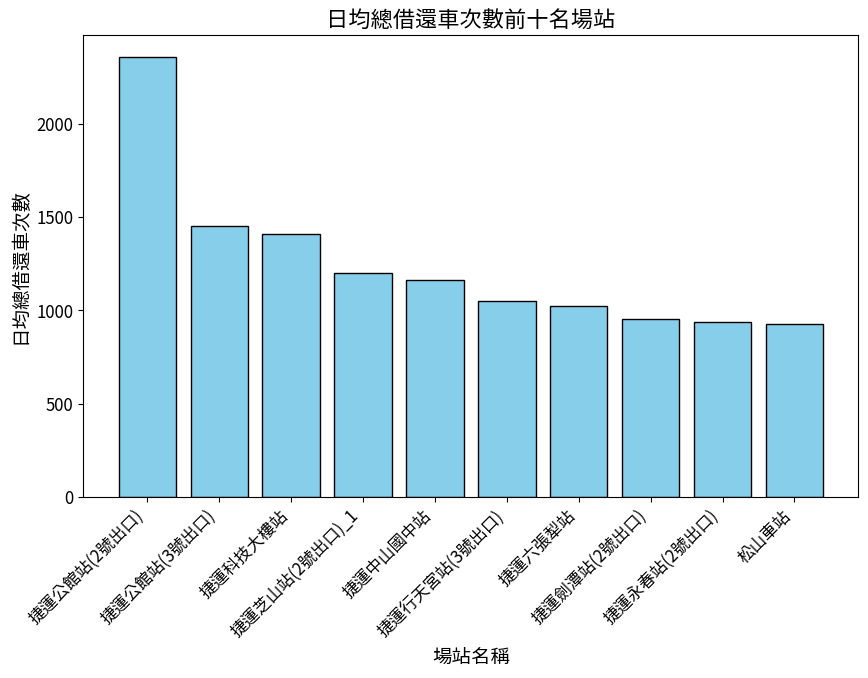

In [24]:
#找出整體還車次數前十多的場站

# 1. 統計各站的日均借車次數和日均還車次數:已完成

# 2. 合併借車和還車資料，計算日均總借還車次數
merged_data = pd.merge(station_rent_counts, station_return_counts, left_on="借車場站", right_on="還車場站", how="outer")
merged_data.drop(columns=["借車次數", "還車次數"], inplace=True)
merged_data = merged_data.rename(columns={"借車場站": "場站名稱"})
merged_data["日均總借還車次數"] = merged_data["日均還車次數"] + merged_data["日均借車次數"]

# 3. 匯出前十名站點的長條圖
top_10_stations = merged_data.sort_values(by=["日均總借還車次數"], ascending=False).head(10)
bar_plot(x = top_10_stations["場站名稱"], y = top_10_stations["日均總借還車次數"], title = "日均總借還車次數前十名場站", xlabel = "場站名稱", ylabel = "日均總借還車次數")

工作日上午/下午尖峰日均最高十個借還

*尖峰時間計算為工作日上午/下午時段內總借還車次數最高的連續兩小時

上午尖峰小時: [8]


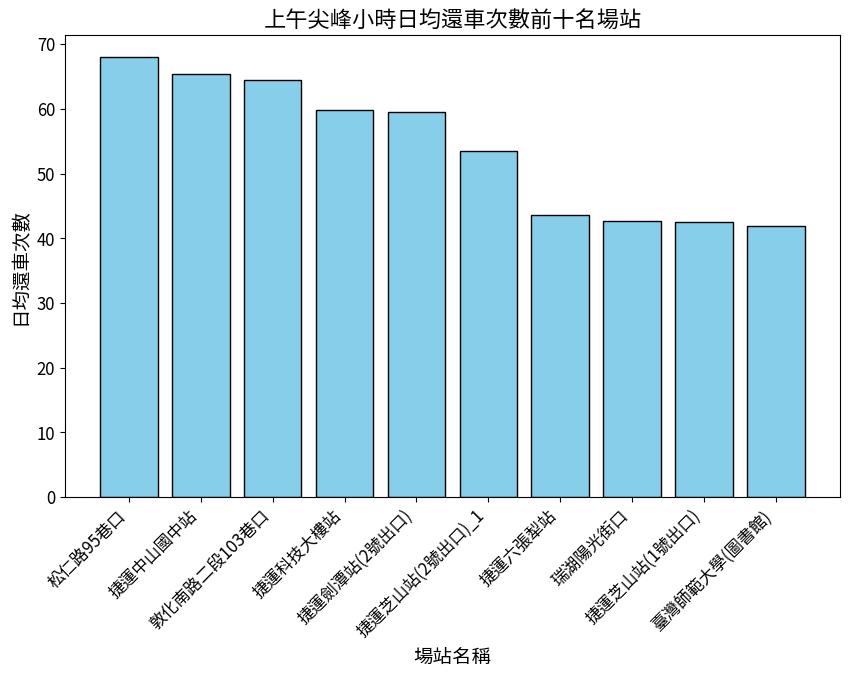

In [25]:
weekday_data = df_202303[df_202303["借用日期類型"] == "平日"]


#上午
# 1. 統計各小時借還車總次數
hourly_rent_counts = weekday_data.groupby("借車時間(小時)").size().reset_index()
hourly_rent_counts = hourly_rent_counts.rename(columns = {0: "借車次數"})
hourly_return_counts = weekday_data.groupby("還車時間(小時)").size().reset_index()
hourly_return_counts = hourly_return_counts.rename(columns = {0: "還車次數"})

# 2. 找出上午最高的單一小時為上午尖峰小時
max_rent_hours = hourly_rent_counts.loc[hourly_rent_counts["借車時間(小時)"] < 12, "借車次數"].idxmax()  # 上午最高借車次數的小時
morning_peak_hours = [max_rent_hours]  # 上午尖峰小時，只包含單一小時
print("上午尖峰小時:", morning_peak_hours)

# 3. 統計各站在上午尖峰小時的日均還車次數
morning_peak_returns = weekday_data[weekday_data["還車時間(小時)"].isin(morning_peak_hours)]
station_morning_peak_returns = morning_peak_returns.groupby("還車場站").size().reset_index()
station_morning_peak_returns = station_morning_peak_returns.rename(columns = {0: "還車次數"})
station_morning_peak_returns["日均還車次數"] = station_morning_peak_returns["還車次數"] / 31
 # 除以 31 天，得到日均還車次數

# 4. 匯出前十名站點的長條圖
top_10_return_stations = station_morning_peak_returns.sort_values(by=["日均還車次數"], ascending=False).head(10)
bar_plot(x = top_10_return_stations["還車場站"], y = top_10_return_stations["日均還車次數"], title = "上午尖峰小時日均還車次數前十名場站", xlabel = "場站名稱", ylabel = "日均還車次數")

下午尖峰小時: [18]


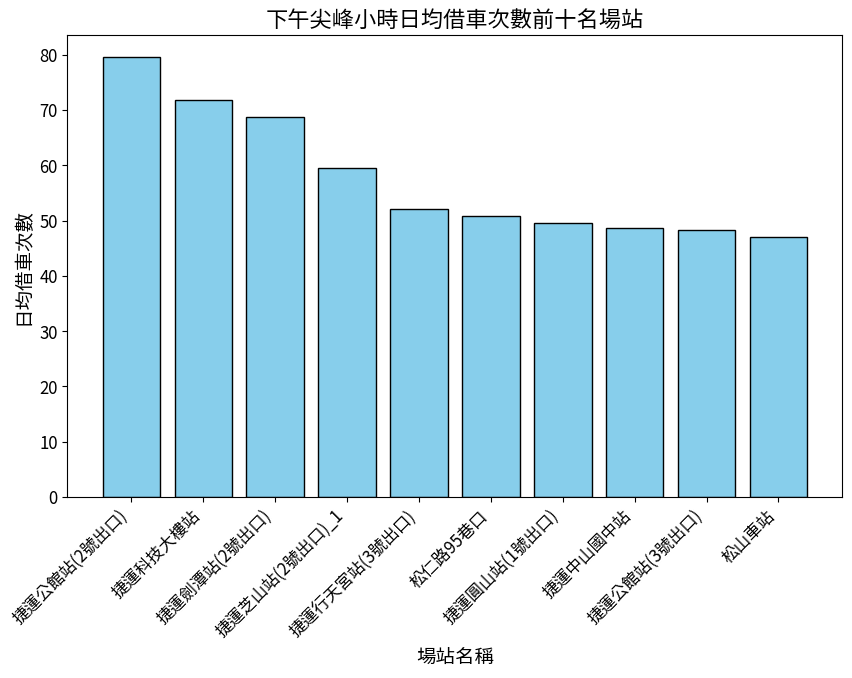

In [26]:
#下午
# 2. 找出下午最高的單一小時為下午尖峰小時
afternoon_rent_counts = hourly_rent_counts[hourly_rent_counts["借車時間(小時)"] >= 12]  # 篩選下午時段的資料
max_afternoon_rent_hour = afternoon_rent_counts.loc[afternoon_rent_counts["借車次數"].idxmax(), "借車時間(小時)"]  # 下午最高借車次數的小時
afternoon_peak_hours = [max_afternoon_rent_hour]  # 下午尖峰小時
print("下午尖峰小時:", afternoon_peak_hours)


# 3. 統計各站在下午尖峰小時的累計借車次數
afternoon_peak_rents = weekday_data[weekday_data["借車時間(小時)"].isin(afternoon_peak_hours)]
station_afternoon_peak_rents = afternoon_peak_rents.groupby("借車場站").size().reset_index()
station_afternoon_peak_rents = station_afternoon_peak_rents.rename(columns = {0: "借車次數"})
station_afternoon_peak_rents["日均借車次數"] = station_afternoon_peak_rents["借車次數"] / 31

# 4. 匯出前十名站點的長條圖
top_10_rent_stations = station_afternoon_peak_rents.sort_values(by=["日均借車次數"], ascending=False).head(10)
bar_plot(x = top_10_rent_stations["借車場站"], y = top_10_rent_stations["日均借車次數"], title = "下午尖峰小時日均借車次數前十名場站", xlabel = "場站名稱", ylabel = "日均借車次數")

假日最高十個借還場站

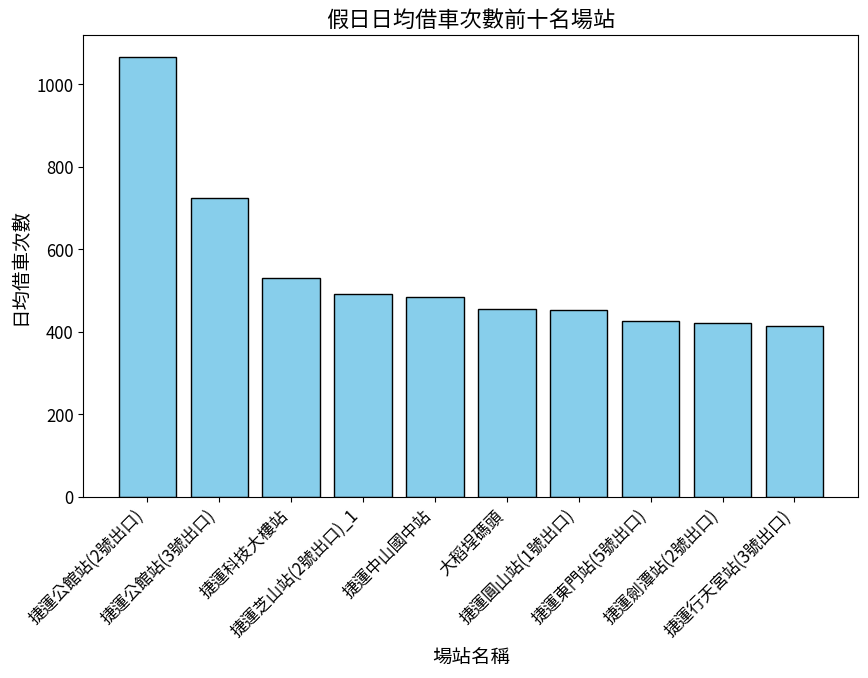

In [27]:
#借車
# 1. 篩選假日資料
weekend_data = df_202303[df_202303["借用日期類型"] == "假日"]

# 2. 統計各站在假日的借車次數
station_weekend_rents = weekend_data.groupby("借車場站").size().reset_index()
station_weekend_rents = station_weekend_rents.rename(columns = {0: "借車次數"})
station_weekend_rents["日均借車次數"] = station_weekend_rents["借車次數"] / 8

# 3. 匯出前十名站點的長條圖
top_10_weekend_rent_stations = station_weekend_rents.sort_values(by=["日均借車次數"], ascending=False).head(10)
bar_plot(x = top_10_weekend_rent_stations["借車場站"], y = top_10_weekend_rent_stations["日均借車次數"], title = "假日日均借車次數前十名場站", xlabel = "場站名稱", ylabel = "日均借車次數")

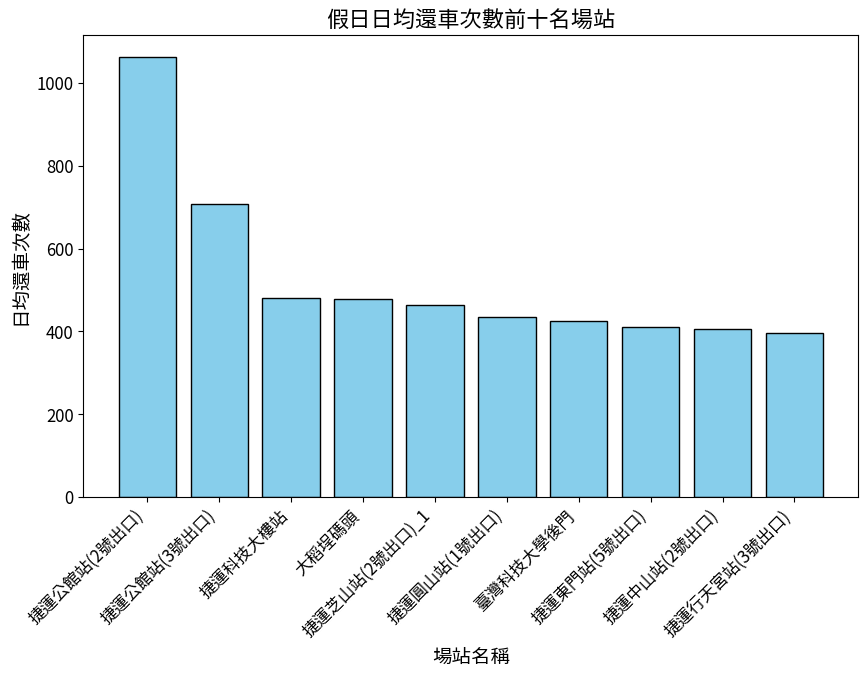

In [28]:
#還車
# 統計各站在假日的還車次數
station_weekend_returns = weekend_data.groupby("還車場站").size().reset_index()
station_weekend_returns = station_weekend_returns.rename(columns = {0: "還車次數"})
station_weekend_returns["日均還車次數"] = station_weekend_returns["還車次數"] / 8

# 匯出前十名站點的長條圖
top_10_weekend_return_stations = station_weekend_returns.sort_values(by=["日均還車次數"], ascending=False).head(10)
bar_plot(x = top_10_weekend_return_stations["還車場站"], y = top_10_weekend_return_stations["日均還車次數"], title = "假日日均還車次數前十名場站", xlabel = "場站名稱", ylabel = "日均還車次數")

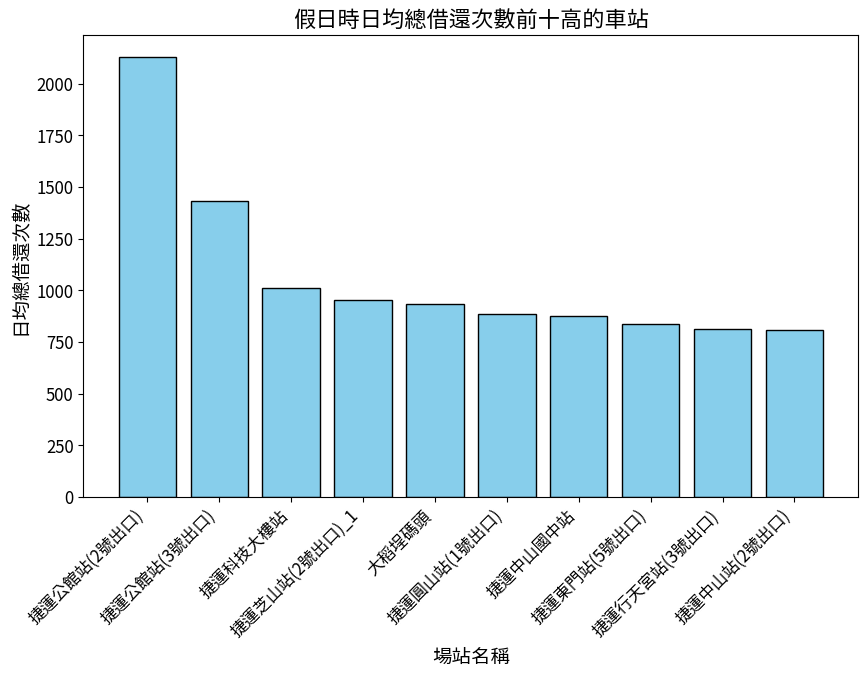

In [29]:
#借還車

#  合併借車和還車資料，計算日均總借還車次數
station_holiday_counts = pd.merge(station_weekend_rents, station_weekend_returns, left_on="借車場站", right_on="還車場站", how="outer")
station_holiday_counts.drop(columns=["還車場站"], inplace=True)
station_holiday_counts = station_holiday_counts.rename(columns={"借車場站": "場站名稱"})
station_holiday_counts["總借還次數"] = station_holiday_counts["借車次數"] + station_holiday_counts["還車次數"]
station_holiday_counts["日均總借還次數"] = station_holiday_counts["總借還次數"] / 8

# 匯出前十名站點的長條圖
top_10_holiday_stations = station_holiday_counts.sort_values(by=["日均總借還次數"], ascending=False).head(10)
bar_plot(x = top_10_holiday_stations["場站名稱"], y = top_10_holiday_stations["日均總借還次數"], title = "假日時日均總借還次數前十高的車站", xlabel = "場站名稱", ylabel = "日均總借還次數")

調度需求指標(還車-借車)

*工作日上午/下午尖峰調度需求指標最佳前10名

In [30]:
import numpy as np
#工作日上午尖峰
# 1. 統計各站在上午尖峰小時的借車和還車次數
morning_peak_rents = weekday_data[weekday_data["借車時間(小時)"].isin(morning_peak_hours)]
morning_peak_returns = weekday_data[weekday_data["還車時間(小時)"].isin(morning_peak_hours)]

station_morning_peak_rents = morning_peak_rents.groupby("借車場站").size().reset_index()
station_morning_peak_rents = station_morning_peak_rents.rename(columns = {0: "借車次數"})
station_morning_peak_returns = morning_peak_returns.groupby("還車場站").size().reset_index()
station_morning_peak_returns = station_morning_peak_returns.rename(columns = {0: "還車次數"})

# 2. 合併借車和還車資料，計算調度率
merged_data = pd.merge(station_morning_peak_rents, station_morning_peak_returns, left_on="借車場站", right_on="還車場站", how="inner")
merged_data.drop(columns=["還車場站"], inplace=True)
merged_data = merged_data.rename(columns={"借車場站": "場站名稱"})
merged_data["調度需求指標"] = (merged_data["還車次數"] - merged_data["借車次數"]) / 23  # 工作日有 23 天
merged_data["調度需求指標絕對值"] = np.abs(merged_data["調度需求指標"]) # 計算調度率絕對值

#工作日下午尖峰
# 1. 統計各站在下午尖峰小時的借車和還車次數
afternoon_peak_rents = weekday_data[weekday_data["借車時間(小時)"].isin(afternoon_peak_hours)]
afternoon_peak_returns = weekday_data[weekday_data["還車時間(小時)"].isin(afternoon_peak_hours)]

station_afternoon_peak_rents = afternoon_peak_rents.groupby("借車場站").size().reset_index()
station_afternoon_peak_rents = station_afternoon_peak_rents.rename(columns = {0: "借車次數"})
station_afternoon_peak_returns = afternoon_peak_returns.groupby("還車場站").size().reset_index()
station_afternoon_peak_returns = station_afternoon_peak_returns.rename(columns = {0: "還車次數"})

# 2. 合併借車和還車資料，計算調度率
merged_data_afternoon = pd.merge(station_afternoon_peak_rents, station_afternoon_peak_returns, left_on="借車場站", right_on="還車場站", how="inner")
merged_data_afternoon.drop(columns=["還車場站"], inplace=True)
merged_data_afternoon = merged_data_afternoon.rename(columns={"借車場站": "場站名稱"})
merged_data_afternoon["調度需求指標"] = (merged_data_afternoon["還車次數"] - merged_data_afternoon["借車次數"]) / 23  # 工作日有 23 天
merged_data_afternoon["調度需求指標絕對值"] = np.abs(merged_data_afternoon["調度需求指標"])  # 計算調度率絕對值

工作上午/下午尖峰調度需求指標最大前10名

*代表還車數過多，需要趕緊調度車輛離開

In [31]:
#工作日上午尖峰
largest_10_stations_morning = merged_data.sort_values(by=["調度需求指標"], ascending=False).head(10)

# 顯示表格
display(largest_10_stations_morning[["場站名稱", "調度需求指標"]])

,場站名稱,調度需求指標
616,敦化南路二段103巷口,82.695652
724,松仁路95巷口,82.304348
866,瑞湖陽光街口,55.869565
1005,臺大小福樓東側,44.913043
806,民生敦化路口,44.043478
467,捷運劍潭站(2號出口),43.260870
831,洲子二號公園,41.217391
1032,臺大社科院西側,35.173913
471,捷運北投站(1號出口),33.130435
1052,臺灣師範大學(圖書館),32.652174


In [32]:
#工作日下午尖峰
largest_10_stations_afternoon = merged_data_afternoon.sort_values(by=["調度需求指標"], ascending=False).head(10)

# 顯示表格
display(largest_10_stations_afternoon[["場站名稱", "調度需求指標"]])

,場站名稱,調度需求指標
465,捷運公館站(2號出口),57.043478
466,捷運公館站(3號出口),38.869565
881,百齡國小,31.565217
574,捷運港墘站(2號出口),21.869565
155,北投運動中心,18.391304
843,清江國小,17.521739
989,臺北轉運站,17.391304
859,牯嶺公園,17.000000
910,福港街停車場,14.434783
1189,金華公園,14.086957


工作上午/下午尖峰調度需求指標最小前10名

*代表借車數過多，需要趕緊調度車輛至場站

In [33]:
#工作日上午尖峰
smallest_10_stations_morning = merged_data.sort_values(by=["調度需求指標"], ascending=True).head(10)

# 顯示表格
display(smallest_10_stations_morning[["場站名稱", "調度需求指標"]])

,場站名稱,調度需求指標
563,捷運松江南京站(7號出口),-41.782609
874,百齡國小,-33.217391
853,牯嶺公園,-29.173913
600,捷運象山站(3號出口),-24.217391
827,泰和公園,-21.260870
507,捷運大安森林公園站(2號出口),-20.043478
463,捷運六張犁站,-19.826087
1050,臺大鹿鳴堂東側,-19.304348
881,碧山公園,-18.782609
461,捷運公館站(3號出口),-18.565217


In [34]:
#工作日下午尖峰
smallest_10_stations_afternoon = merged_data_afternoon.sort_values(by=["調度需求指標"], ascending=True).head(10)

# 顯示表格
display(smallest_10_stations_afternoon[["場站名稱", "調度需求指標"]])

,場站名稱,調度需求指標
472,捷運劍潭站(2號出口),-59.913043
729,松仁路95巷口,-40.695652
837,洲子二號公園,-39.782609
621,敦化南路二段103巷口,-34.652174
873,瑞湖陽光街口,-33.913043
589,捷運芝山站(2號出口)_1,-31.869565
811,民生敦化路口,-28.347826
1012,臺大女九舍西南側,-24.608696
87,信義廣場(台北101),-21.608696
966,臺北南山廣場_1,-21.217391


流動率((借還車總數/車架數))前十場站

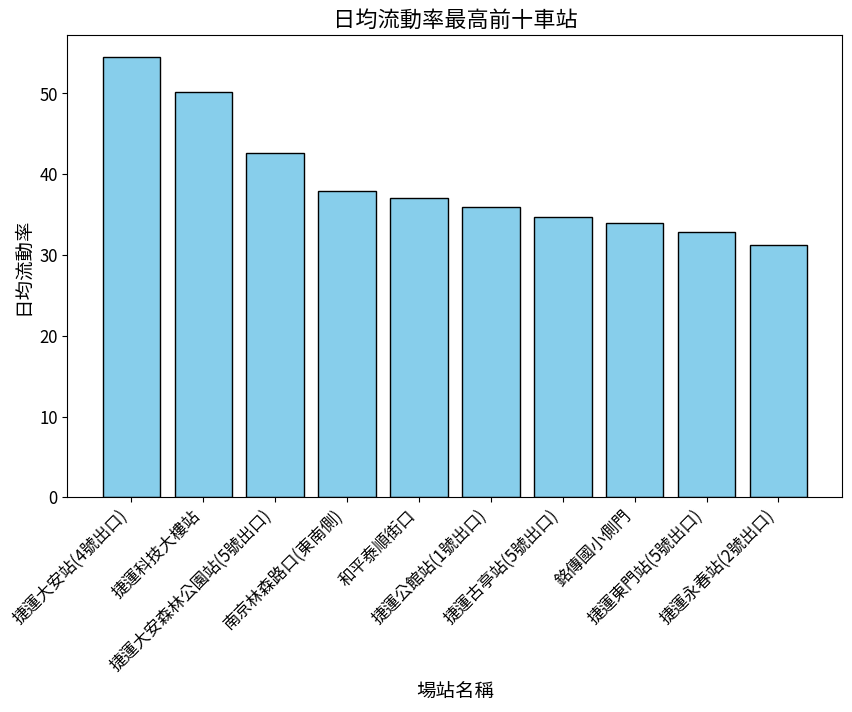

In [35]:
# Merge rental and return data；Calculate total daily rentals and returns
merged_data = pd.merge(station_rent_counts, station_return_counts, left_on="借車場站", right_on="還車場站", how="outer")
merged_data.drop(columns=["借車次數", "還車次數"], inplace=True)
merged_data = merged_data.rename(columns={"借車場站": "場站名稱"})
merged_data["日均總借還車次數"] = merged_data["日均借車次數"] + merged_data["日均還車次數"] # Merge with stationInfo to get bike rack counts
merged_data = pd.merge(merged_data, stationInfo[["場站名稱", "可停車數"]], on="場站名稱", how="left")

# Calculate turnover rate
merged_data["日均流動率"] = merged_data["日均總借還車次數"] / merged_data["可停車數"]

# Get top 10 stations by turnover rate
top_10_stations = merged_data.sort_values(by=["日均流動率"], ascending=False).head(10)

# Create bar chart
bar_plot(top_10_stations["場站名稱"],top_10_stations["日均流動率"], "日均流動率最高前十車站","場站名稱","日均流動率")